# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

- The weather becomes a lot warmer as you approach the equator which is designated at 0 degree lattitude.
- This time of the year the weather is warmer in the northern parts of the hemisphere.
- 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import datetime as dt
# Import API key
api_key="c68ce3784c7869960c8805a8aea60f7a"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

now = dt.datetime.today().strftime("%m/%d/%y")

## Generate Cities List

In [38]:
#api key
#api_key = "c68ce3784c7869960c8805a8aea60f7a"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial" #Fahrenheit

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifying nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#api_key = "c68ce3784c7869960c8805a8aea60f7a"

In [41]:
# Starting URL for Weather Map API Call
api_key = "c68ce3784c7869960c8805a8aea60f7a"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [42]:
# Defining a list for city data
city_data = []

In [43]:
# Printting to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [44]:
# Creating counters
record_count = 1
set_count = 1

In [45]:
# Looping through the cities in the list
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

    # Creating an endpoint URL 
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    
    
    # Logging the url, record, and setting  numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    
    # Adding  1 to the record count
    record_count = record_count + 1
    
    
 # Running an API request for each city
    try:
        # Parsing the JSON and retrieving data
        city_weather = requests.get(city_url).json()

        # Parseing out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Appending the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced...
    except:
        print("City not found. Skipping...")
        pass

# Indicating that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puro
Processing Record 2 of Set 1 | noumea
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | madimba
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | sayyan
Processing Record 8 of Set 1 | werda
Processing Record 9 of Set 1 | gao
Processing Record 10 of Set 1 | kulhudhuffushi
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | chopinzinho
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | koumac
Processing Record 20 of Set 1 | kovur
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | raga
City not found. Skipping...
Processing Record 23 of Set 1 | mar del

Processing Record 34 of Set 4 | antofagasta
Processing Record 35 of Set 4 | saint-francois
Processing Record 36 of Set 4 | ardakan
Processing Record 37 of Set 4 | pitimbu
Processing Record 38 of Set 4 | egvekinot
Processing Record 39 of Set 4 | kununurra
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | at-bashi
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | turukhansk
Processing Record 44 of Set 4 | coruripe
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | mozarlandia
Processing Record 49 of Set 4 | waterboro
Processing Record 0 of Set 5 | shunyi
Processing Record 1 of Set 5 | borskoye
Processing Record 2 of Set 5 | starachowice
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | sucua
Processing Record 5 of Set 5 | ende
Processing Record 6 of Set 5 | soria
Processing Record 7 of Set 5 | vaitupu
City not found. S

Processing Record 27 of Set 8 | bosilegrad
Processing Record 28 of Set 8 | praia da vitoria
Processing Record 29 of Set 8 | altenholz
Processing Record 30 of Set 8 | vostok
Processing Record 31 of Set 8 | ramnagar
Processing Record 32 of Set 8 | ningbo
Processing Record 33 of Set 8 | sabha
Processing Record 34 of Set 8 | arthur
Processing Record 35 of Set 8 | arona
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | adet
Processing Record 38 of Set 8 | dukat
Processing Record 39 of Set 8 | muscat
Processing Record 40 of Set 8 | hoyerswerda
Processing Record 41 of Set 8 | ust-nera
Processing Record 42 of Set 8 | beloha
Processing Record 43 of Set 8 | monterey
Processing Record 44 of Set 8 | kawalu
Processing Record 45 of Set 8 | port macquarie
Processing Record 46 of Set 8 | naze
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | marseille
Processing Record 49 of Set 8 | galle
Processing Record 0 of Set 9 | tandil
Processing Record 1 of Set 9 |

Processing Record 12 of Set 12 | gull lake
Processing Record 13 of Set 12 | innisfail
Processing Record 14 of Set 12 | harlingen
Processing Record 15 of Set 12 | labrea
City not found. Skipping...
Processing Record 16 of Set 12 | redcliffe
Processing Record 17 of Set 12 | prince rupert
Processing Record 18 of Set 12 | lagunas
Processing Record 19 of Set 12 | havre-saint-pierre
Processing Record 20 of Set 12 | choya
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | plettenberg bay
Processing Record 23 of Set 12 | lubbock
Processing Record 24 of Set 12 | beamsville
Processing Record 25 of Set 12 | gwanda
Processing Record 26 of Set 12 | haibowan
City not found. Skipping...
Processing Record 27 of Set 12 | lavrentiya
Processing Record 28 of Set 12 | nanfeng
Processing Record 29 of Set 12 | saint-georges
Processing Record 30 of Set 12 | meadow lake
Processing Record 31 of Set 12 | kanbe
Processing Record 32 of Set 12 | zhigalovo
Processing Record 33 of Set 12 | su

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# Converting a JSONs array into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

In [47]:
# Extracting relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [49]:
# Exporting City_Data DF into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Showing Record Count
city_data_pd.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [51]:
# Displaying City DF
city_data_pd.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puro,82,PH,1564467388,72,13.13,123.76,83.96,4.99
1,noumea,75,NC,1564467250,64,-22.28,166.46,69.80,8.05
2,hermanus,58,ZA,1564467389,57,-34.42,19.24,62.01,11.99
3,madimba,75,CM,1564467389,100,4.42,9.93,75.20,2.24
4,kruisfontein,18,ZA,1564467390,57,-34.00,24.73,56.78,6.33
5,sayyan,96,YE,1564467390,44,15.17,44.32,79.28,3.04
6,werda,0,BW,1564467390,24,-25.27,23.28,52.28,6.33
7,gao,92,ML,1564467391,51,16.28,-0.04,88.28,10.25
8,kulhudhuffushi,100,MV,1564467391,67,6.62,73.07,82.52,4.56
9,hobart,75,AU,1564467288,70,-42.88,147.33,50.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


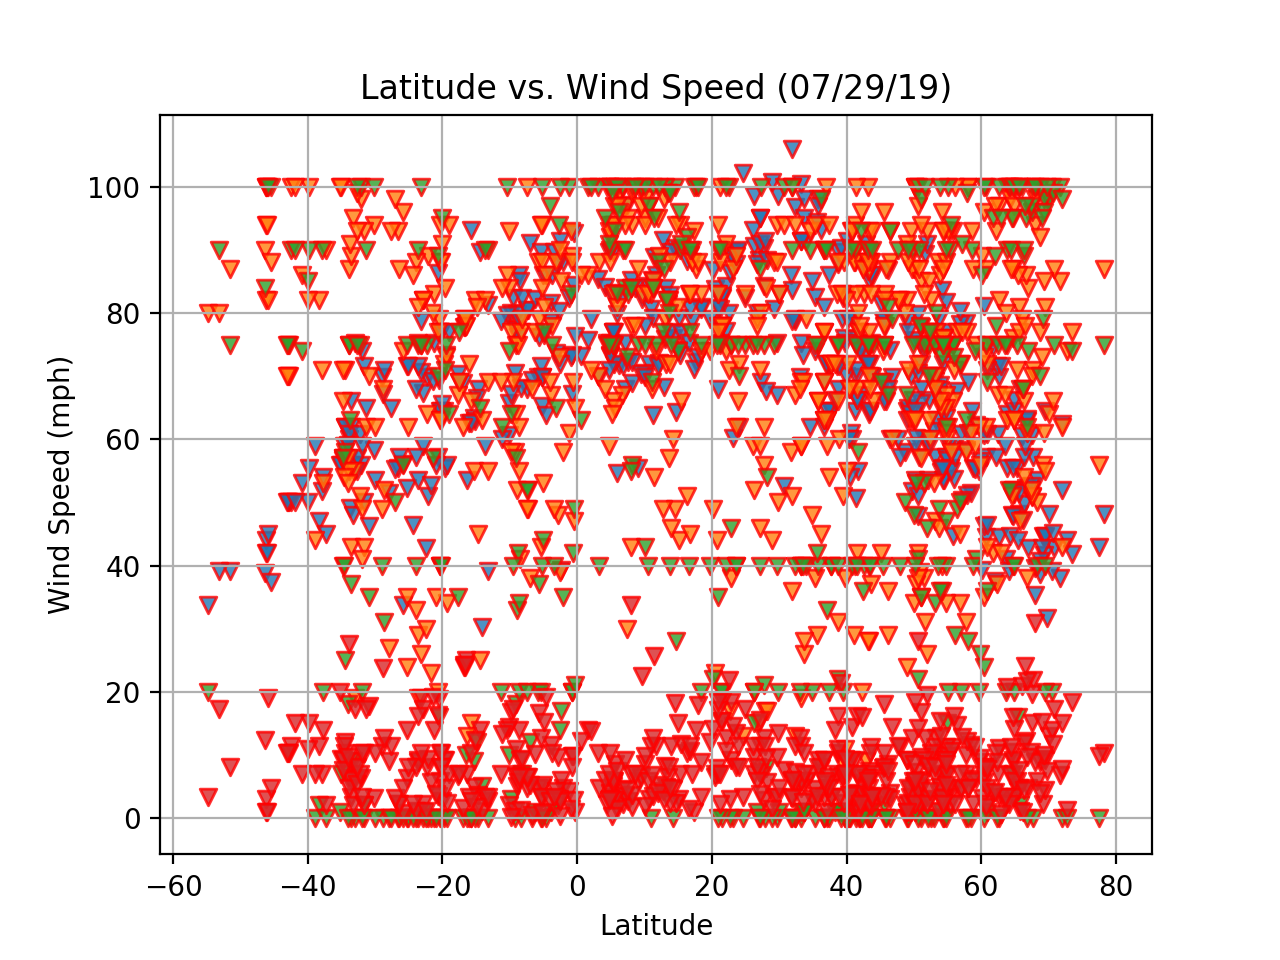

In [65]:
#Plot for Latitude vs Temperature
plt.scatter(lats, max_temps, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")

plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Temperature.png")

# Showing the plot
plt.show()

#### Latitude vs. Humidity Plot

In [66]:
# Plot for latitude vs. humidity 
plt.scatter(lats,humidity, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")

plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Showing the plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [67]:
# Plots for latitude vs. cloudiness 
plt.scatter(lats, cloudiness, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Showing the plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [68]:
# Plots for latitude vs. wind speed plot
plt.scatter(lats,wind_speed, edgecolor="red", linewidths=1, marker="v",alpha=0.8, label="Cities")

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Wind.png")

# Showing the plot
plt.show()